In [1]:
from __future__ import division      #除数可以显示为float

from six import StringIO    #使用聚宽readfile函数
import numpy as np
import pandas as pd

import time                 #使用time stamp
import datetime             

import matplotlib.pyplot as plt

import math

# 最基本的KNN算法
from sklearn.neighbors import KNeighborsClassifier

# 导入样本拆分模块
from sklearn.model_selection import train_test_split

# 导入KNN半径算法
from sklearn.neighbors import RadiusNeighborsClassifier


In [2]:

# 读取归一化后的数据
Data_Csv = pd.DataFrame()
Data_Csv = pd.read_csv("Data_Normalize.csv")


# 生成测试数据
x =  np.array(Data_Csv.loc[:,['MACD_macd', 'EMA_gap', 'KDJ_J', 'RSI', 'MOM', 'MOM_gap', 'OBV', \
        'Long_Short_Rate_OBV', 'KDJ_J_pre', 'MOM_pre', 'MOM_gap_pre', \
       'OBV_pre', 'Long_Short_Rate_OBV_pre', 'MACD_macd_pre','EMA_gap_pre']])

# 生成测试结果
y = np.array(Data_Csv.loc[:,"win_rate"])

k = 5

# 分别生成训练数据、测试数据
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors=k)))
models.append(("KNN with weights", KNeighborsClassifier(
    n_neighbors=k, weights="distance")))
models.append(("Radius Neighbors", RadiusNeighborsClassifier(
    n_neighbors=k, radius=25)))

results = []
for name, model in models:
    model.fit(x_train, y_train)
    results.append((name, model.score(x_test, y_test)))
    
for i in range(len(results)):
    print("name: {}; score: {}".format(results[i][0],results[i][1]))

name: KNN; score: 0.788395904437
name: KNN with weights; score: 0.787542662116
name: Radius Neighbors; score: 0.811433447099


In [3]:
# 多次分配训练数据集、交叉验证数据集，求模型准确性的评分
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, x, y, cv=kfold)
    results.append((name, cv_result))
    
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(
        results[i][0],results[i][1].mean()))

name: KNN; cross val score: 0.8
name: KNN with weights; cross val score: 0.797269624573
name: Radius Neighbors; cross val score: 0.827303754266


In [4]:
# 单独看半径算法的情况
knn = RadiusNeighborsClassifier(n_neighbors=k, radius=25)
knn.fit(x_train, y_train)
train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)
print("train score: {}; test score: {}".format(train_score, test_score))

train score: 0.831271331058; test score: 0.811433447099


In [43]:

from sklearn.metrics import precision_score, recall_score, f1_score
 
y_true = [0, 1, 1, 0, 1, 1, 0, -1]
y_pred = [1, 1, 1, 0, 0, 0, 1, -1]
 
# p = precision_score(y_true, y_pred, average='binary')
# r = recall_score(y_true, y_pred, average='binary')
# f1score = f1_score(y_true, y_pred, average='binary')
 
# print(p)
# print(r)
# print(f1score)

# np.set_printoptions(threshold='nan') 
# print y_test
# print np.array(knn.predict(x_test))


precision_score(y_true,y_pred ,labels  = ,average = None)

array([ 1.        ,  0.33333333,  0.5       ])

In [6]:
# 画出学习曲线
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# 参数赋值
knn = knn
print type(y)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

train_sizes, train_scores, test_scores = learning_curve(
        knn, x, y, cv=cv, n_jobs=1, train_sizes=np.array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]))


<type 'numpy.ndarray'>


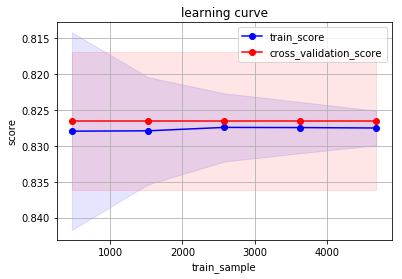

In [7]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("learning curve")


plt.xlabel(u"train_sample")
plt.ylabel(u"score")
plt.gca().invert_yaxis()
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")

plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train_score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cross_validation_score")

plt.legend(loc="best")

plt.draw()
plt.show()


In [ ]:
plot_learning_curve(knn, "title", x, y, ylim=(0.7, 1.01), n_jobs=4)


In [48]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
X_new = selector.fit_transform(x, y)
X_new[0:5]



array([[4, 1],
       [4, 1],
       [3, 1],
       [2, 1],
       [1, 1]], dtype=int64)

In [ ]:
# 保存模型参数
from sklearn.externals import joblib
joblib.dump(clf, 'digits_svm.pkl');

In [ ]:
# 导入模型参数，直接进行预测
clf = joblib.load('digits_svm.pkl')
Ypred = clf.predict(Xtest);
clf.score(Xtest, Ytest)